In [1]:
import pandas as pd
import numpy as np
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
import nltk
#either of the below code will work
#from nltk.corpus import stopwords
#nltk.download('stopwords')

In [5]:
ds = pd.read_csv('../input/Sentiment.csv')

In [6]:
ds.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
#Counting number of words in each tweet
ds['word_count'] = ds['tweet'].apply(lambda x : len(str(x).split(" ")))
ds[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


In [8]:
#Number of character
ds['char_count'] = ds['tweet'].str.len()
ds[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


In [9]:
#Avg word length
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words) /len(words))

ds['avg_word'] = ds['tweet'].apply(lambda x : avg_word(x))
ds[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


In [15]:
# Number of special characters
ds['hastags'] = ds['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
ds[['tweet','hastags']].head()


#Number of numeric 
ds['numerics'] = ds['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
ds[['tweet','numerics']].head()

#Number of Upper case
ds['upper'] = ds['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
ds[['tweet','upper']].head()


,tweet,upper
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [16]:
#Preprocessing

# make exery tweet lower
ds['tweet'] = ds['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ds['tweet'].head()

#Remove puntuations
ds['tweet'] = ds['tweet'].str.replace('[^\w\s]','')
ds['tweet'].head()

#Remove stopwords
ds['tweet'] = ds['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
ds['tweet'].head()

# Removing common occuring words
freq = pd.Series(' '.join(ds['tweet']).split()).value_counts()[:10]
freq

user     17473
love      2647
ð         2511
day       2199
â         1797
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

In [17]:
ds['tweet'] = ds['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ds['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [18]:
#Pre Processing

In [19]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets


In [20]:
# Splitting the dataset into train and test set
train, test = train_test_split(ds,test_size = 0.1)

In [21]:
# hate and not hate speech in train and test
train_hate = train[ train['label'] == 1]
train_hate = train_hate['tweet']
train_not = train[ train['label'] == 0]
train_not = train_not['tweet']

In [22]:
def wordcloud_draw(ds, color = 'black'):
    words = ' '.join(ds)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Hate words


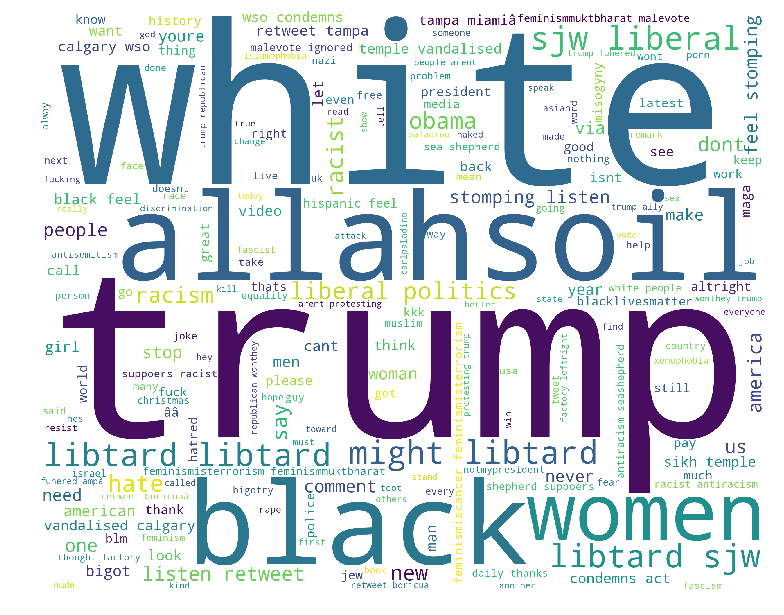

Not Hate words


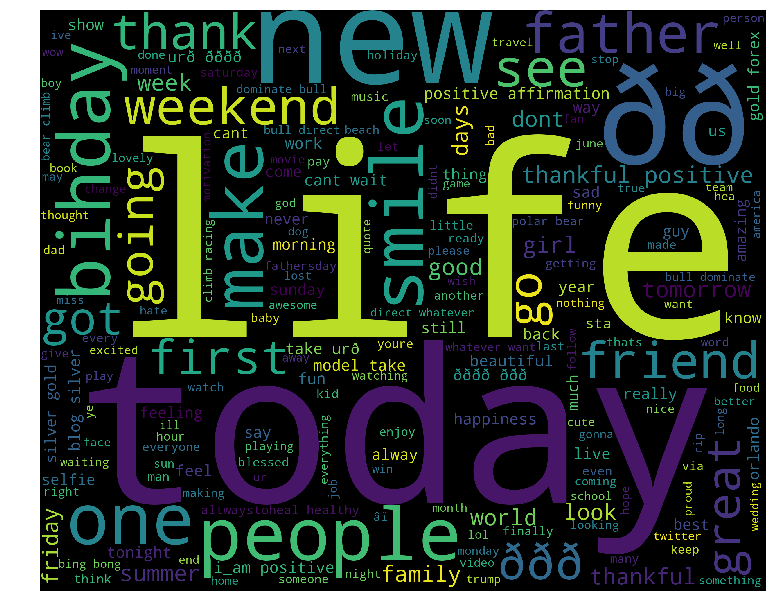

In [23]:
print("Hate words")
wordcloud_draw(train_hate,'white')
print("Not Hate words")
wordcloud_draw(train_not)

In [25]:
tweets = []
stopwords_set = set(stopwords.words("english"))

In [33]:
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.label))

In [34]:
train_hate = train[ train['label'] == 1]
train_hate = train_hate['tweet']
train_not = train[ train['label'] == 0]
train_not = train_not['tweet']

In [35]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

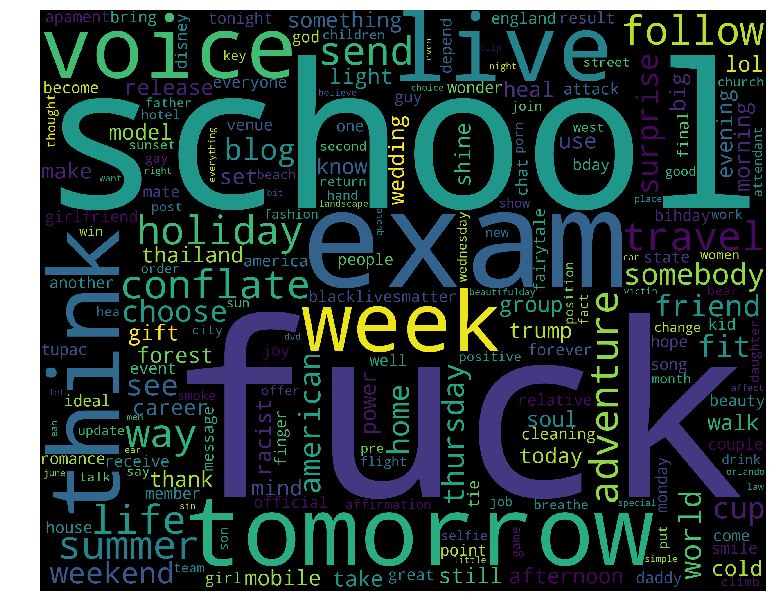

In [36]:
wordcloud_draw(w_features)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_not: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Not Hate'): 
        not_cnt = not_cnt + 1
for obj in test_hate: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Hate'): 
        hate_cnt = hate_cnt + 1
        
print('[Not Hate]: %s/%s '  % (len(test_not),not_cnt))        
print('[Hate]: %s/%s '  % (len(test_hate),hate_cnt))    